In [2]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)


(-12, 15)

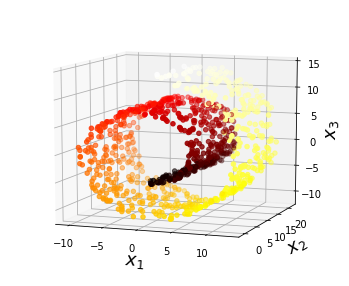

In [5]:
import numpy as np;import matplotlib.pyplot as plt;from mpl_toolkits.mplot3d import Axes3D
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])


### En la gráfica se puede observar un conjunto de datos tridimensional, el cual no se puede reducir su dimensionalidad simplemente utilzando la proyección de los puntos sobre un plano de dimensión inferior.

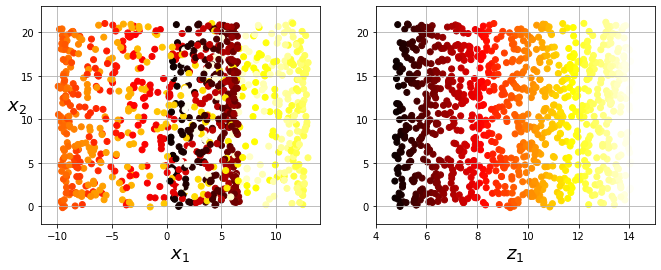

In [6]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

### En la figura izquierda se puede observar como algunas zonas se convierten inseparables cuando se proyectan dichos puntos sobre un plano. En la figura derecha simplemente se desenvuelve (manifold) la espiral sobre el plano X2 y se crea una nueva cordenada Z1 que trata de resumir la información de las dimensiones reducidas.

# Manifold Learning 

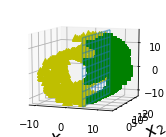

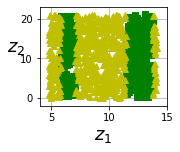

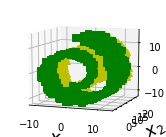

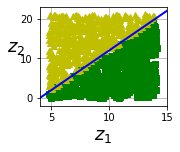

In [8]:
from matplotlib import gridspec

axes = [-11.5, 14, -2, 23, -12, 15]

x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(221, projection='3d')

positive_class = X[:, 0] > 5
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])


fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(222)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)


fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(223, projection='3d')

positive_class = 2 * (t[:] - 4) > X[:, 1]
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(224)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.plot([4, 15], [0, 22], "b-", linewidth=2)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

### En las  dos primeras figuras presentadas se puede observar que no siempre es conveniente aplicar la redución de la dimensionalidad a los datos. Se observa como de hecho la frontera de decisión es más fácil de obtener en el conjunto de datos original que en el conjunto de datos reducidos de dimensión. Como resultado se acelera la velocidad de entrenamiento pero se pierde poder de predicción del modelo.

# PCA

## Elegiendo el número correcto de dimensiones.

In [1]:
from sklearn.datasets import fetch_openml;import numpy as np

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)


In [2]:

from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [3]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit(X_train)
suma_acumluada=np.cumsum(pca.explained_variance_ratio_)

### Una forma de elegir el número correcto de dimensiones es calcular cuantas componentes al sumar su explained variance ratio suman un determinado valor de la varianza del conjunto de datos original (e.g. 95% de la varianza). Este proceso se debe hacer a no ser que el proposito de aplicar pca al conjunto de datos sea para propositos de visualización,caso en el cual el conjunto de datos siempre se querrá reducir a 2 o 3 dimensiones.

In [8]:
np.argmax(suma_acumluada>=0.95)+1

154

### El código anterior nos dice que para preservar el 95% de la varianza original del conjunto de datos se deben reducir estos a un mínimo de 154 dimensiones (En lugar de las 784 que posee el conjunto de datos original)

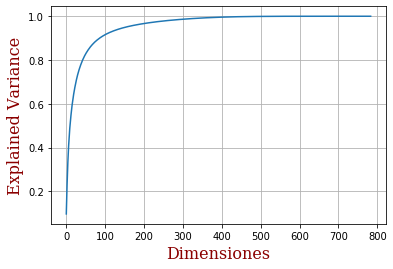

In [17]:
import matplotlib.pyplot as plt
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.plot(suma_acumluada)
plt.ylabel('Explained Variance',fontdict=font)
plt.xlabel('Dimensiones',fontdict=font)
plt.grid(True)

# Incremental PCA 

### Una desventaja del algoritmo PCA convencional es que necesita el conjunto de datos en toda su totalidad para poder correr el agoritmo sobre los datos. Esto representa un gran problema si los datos son muy grandes y desbordan la memoria del sistema. Para este caso existe el algoritmo IPCA, el cual entrena el conjunto de datos por batches, lo cual lo hace ideal para ser aplicado online.

In [18]:
from sklearn.decomposition import IncrementalPCA
n_batches=100 # Dividir el conjunto de datos de entrenamiento en 100 sub-conjuntos
modelo=IncrementalPCA(n_components=154)
batches=np.array_split(X_train,n_batches)
for batch in batches:
    modelo.partial_fit(batch)
modelo.transform(X_train)

array([[ 2.02180077e+02,  5.56382881e+02,  9.08521484e+02, ...,
         2.48389425e+01, -1.30901264e+01,  1.61637161e+01],
       [ 1.18552195e+02, -5.45321189e+01,  2.25325210e+02, ...,
        -1.32823445e+01, -8.75652546e-01,  1.80013424e+01],
       [ 2.61744897e+02, -9.43179085e+02, -4.76823326e+02, ...,
         1.27235031e+01,  1.35463498e+01,  4.51536092e+01],
       ...,
       [ 1.03507209e+03,  3.55782599e+02,  1.02020028e+03, ...,
         5.68273535e+01, -4.62519262e+01,  2.55592353e+01],
       [-4.15793547e+02,  7.75677647e+02,  1.31373476e+02, ...,
        -3.67844340e+01,  6.53182210e+00, -1.27141289e+01],
       [ 2.06295979e+03,  4.44578340e+02,  1.73540948e+02, ...,
        -1.34901284e+01, -1.76579862e+01, -1.11726678e+01]])

In [19]:
X_reduced=modelo.inverse_transform(modelo.transform(X_train))

In [23]:
import matplotlib as mpl
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

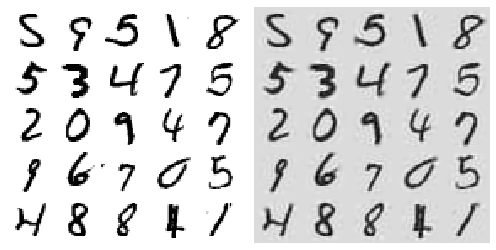

In [24]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_reduced[::2100])
plt.tight_layout()


### En la imagen de la izquierda se observa el conjunto de datos original, mientras que en la derecha se observa el resultado obtenido de descomprimir el conjunto de datos producido por IPCA. Aunque se pierde algo de información, los número siguen siendo claramente distingibles.

# Kernel PCA

Text(0.5, 1.0, 'Sigmoid')

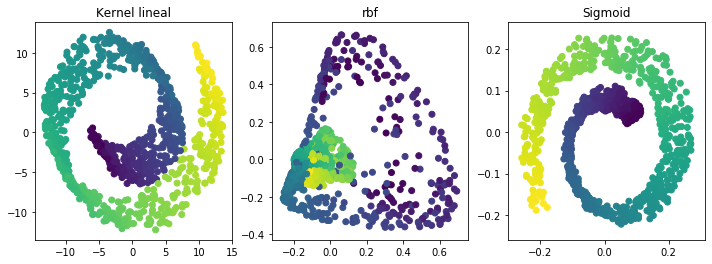

In [13]:
from sklearn. datasets import make_swiss_roll;from sklearn.decomposition import KernelPCA;import matplotlib.pyplot as plt
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
kpca_lineal=KernelPCA(n_components=2,kernel='linear',fit_inverse_transform=True)
kpca_rbf=KernelPCA(n_components=2,kernel='rbf',gamma=0.0433)
kpca_sigmoid=KernelPCA(n_components=2,kernel='sigmoid',gamma=0.001)
plt.figure(figsize=(12,4))

x_reduced=kpca_lineal.fit_transform(X)
plt.subplot(131)
plt.scatter(x_reduced[:,0],x_reduced[:,1],c=t)
plt.title('Kernel lineal')

x_reduced=kpca_rbf.fit_transform(X)
plt.subplot(132)
plt.scatter(x_reduced[:,0],x_reduced[:,1],c=t)
plt.title('rbf')

x_reduced=kpca_sigmoid.fit_transform(X)
plt.subplot(133)
plt.scatter(x_reduced[:,0],x_reduced[:,1],c=t)
plt.title('Sigmoid')



### En el conjunto de figuras anteriores se observa la redución del Swiss roll mediante la aplicación de diferentes kernels. Se observa que una proyección lineal no es buena para hacer una correcta separación de los datos como se muestra en la figura izquierda. Utilizando el kernel como rbf se obtiene una buena separación de los datos en plano de dos dimensiones.

In [2]:
from sklearn.model_selection import GridSearchCV;import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
y = t > 6.9
modelo=Pipeline([('kpca',KernelPCA()),('lr',LogisticRegression())])
parametros_grid=[{'kpca__kernel':['rbf','sigmoid'],'kpca__gamma':np.linspace(0.03,0.06,10)}]

grid=GridSearchCV(estimator=modelo,param_grid=parametros_grid,cv=5,n_jobs=-1)
grid.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kpca',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_inverse_transform=False,
                                                  gamma=None, kernel='linear',
                                                  kernel_params=None,
                                                  max_iter=None,
                                                  n_components=None,
                                                  n_jobs=None,
                                                  random_state=None,
                                                  remove_zero_eig=False,
                                                  tol=0)),
                               

In [3]:
grid.best_params_

{'kpca__gamma': 0.03, 'kpca__kernel': 'rbf'}

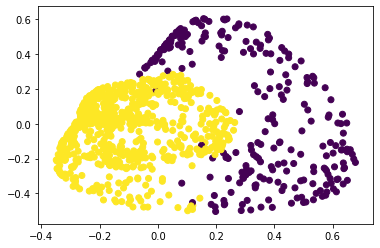

In [4]:
modelo=KernelPCA(kernel='rbf',gamma=0.03,n_components=2)
red=modelo.fit_transform(X)
y = t > 6.9

plt.scatter(red[:,0],red[:,1],c=y)

In [5]:
lr=LogisticRegression()
lr.fit(red,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

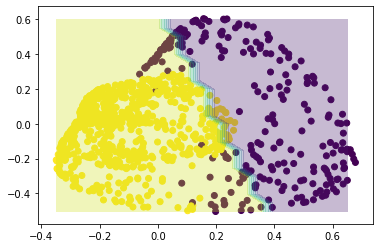

In [6]:
import numpy as np
plt.scatter(red[:,0],red[:,1],c=y)
x_min,x_max=red[:,0].min(),red[:,0].max()
y_min,y_max=red[:,1].min(),red[:,1].max()

xx,yy = np.meshgrid(np.arange(x_min,x_max,0.05),np.arange(y_min,y_max,0.05))

Z=lr.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap='viridis',alpha=0.3)

In [7]:
from sklearn.manifold import LocallyLinearEmbedding;from sklearn.metrics import mean_squared_error
modelo=LocallyLinearEmbedding(n_components=2,n_neighbors=10)
X_red=modelo.fit_transform(X)
modelo.reconstruction_error_

3.840853514309851e-08